<a href="https://colab.research.google.com/github/Nemoy2897/Variational-Auto-Encoder-MNIST/blob/master/Variational_autoencoder_to_draw_MNIST_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
tf.reset_default_graph()

batch_size = 64

X_in = tf.placeholder(dtype = tf.float32, shape=[None,28,28], name ='X')
Y    = tf.placeholder(dtype = tf.float32, shape=[None,28,28], name ='Y')
Y_flat = tf.reshape(Y, shape=[-1, 28 * 28])
keep_prob = tf.placeholder(dtype=tf.float32 ,shape=(), name='keep_prob')

dec_in_channels = 1
n_latent = 8

reshaped_dim =[-1, 7, 7,dec_in_channels]
inputs_decoder = 24



In [0]:
def lrelu(x,alpha=0.3):
  return tf.maximum(x, tf.multiply(x, alpha))


In [0]:
def encoder(X_in, keep_prob):
#   activation=lrelu
  with tf.variable_scope("encoder", reuse=None):
    X = tf.reshape(X_in, shape=[-1, 28, 28, 1])
    x = tf.layers.conv2d(X, filters=64, kernel_size=4,strides=2, padding='same',activation=lrelu)
    x = tf.nn.dropout(x, keep_prob)
    x = tf.layers.conv2d(x, filters=64, kernel_size=4,strides=2, padding='same',activation=lrelu)
    x = tf.nn.dropout(x, keep_prob)
    x = tf.layers.conv2d(x, filters=64, kernel_size=4,strides=1, padding='same',activation=lrelu)
    x = tf.nn.dropout(x, keep_prob)
    x = tf.contrib.layers.flatten(x)
    mn = tf.layers.dense(x, units=n_latent)
    sd = 0.5 * tf.layers.dense(x, units=n_latent)
    epsilon = tf.random_normal(tf.stack([tf.shape(x)[0], n_latent]))
    z = mn + tf.multiply(epsilon, tf.exp(sd))
    
    return z, mn, sd

here comes the copy of the decoder that I saw!

In [0]:
def decoder(sampled_z, keep_prob):
  with tf.variable_scope("decoder", reuse=None):
    x = tf.layers.dense(sampled_z, units=inputs_decoder, activation=lrelu)
    x = tf.layers.dense(x, units=inputs_decoder * 2+1 , activation=lrelu)
    x = tf.reshape(x, reshaped_dim)
    x = tf.layers.conv2d_transpose(x, filters=64, kernel_size=4, strides=2, padding='same', activation=tf.nn.relu)
    x = tf.nn.dropout(x, keep_prob)
    x = tf.layers.conv2d_transpose(x, filters=64, kernel_size=4, strides=1, padding='same', activation=tf.nn.relu)
    x = tf.nn.dropout(x, keep_prob)
    x = tf.layers.conv2d_transpose(x, filters=64, kernel_size=4, strides=1, padding='same', activation=tf.nn.relu)
    
    x = tf.contrib.layers.flatten(x)
    x = tf.layers.dense(x, units=28*28, activation=tf.nn.sigmoid)
    img = tf.reshape(x, shape=[-1, 28, 28])
    
    return img

In [0]:
sampled, mn, sd =encoder(X_in, keep_prob)
dec = decoder(sampled, keep_prob)

In [0]:
unreshaped = tf.reshape(dec, [-1,28*28])
img_loss = tf.reduce_sum(tf.squared_difference(unreshaped, Y_flat), 1)

In [0]:
latent_loss = -0.5 * tf.reduce_sum(1.0 + 2.0*sd - tf.square(mn) - tf.exp(2.0 * sd),1)
loss = tf.reduce_mean(img_loss + latent_loss)
optimizer = tf.train.AdamOptimizer(0.0005).minimize(loss)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [0]:

print(batch.shape)

(64, 28, 28)


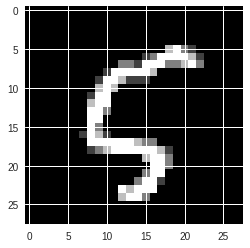

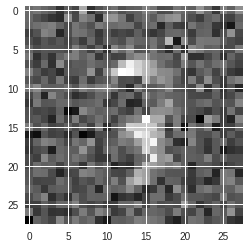

0 178.02237 178.0188 0.0035776468


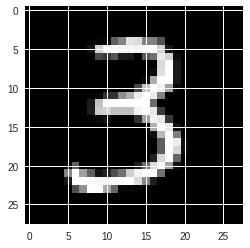

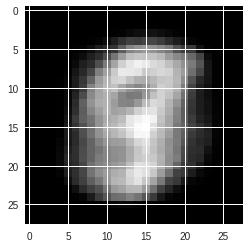

200 53.121086 51.777405 1.3436828


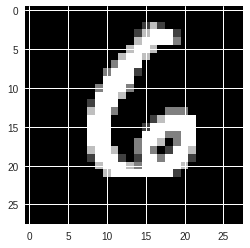

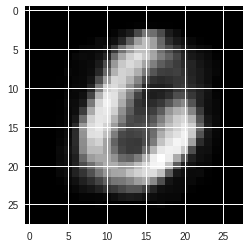

400 41.129234 35.689983 5.43925


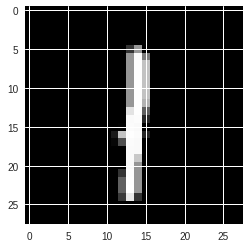

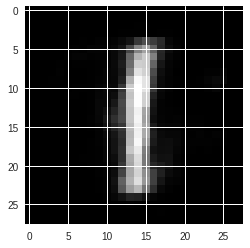

600 35.95034 28.580666 7.3696756


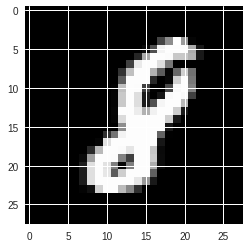

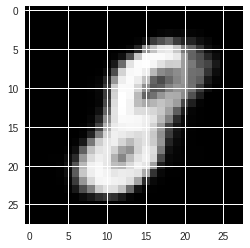

800 33.538437 24.893059 8.64538


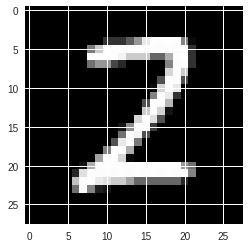

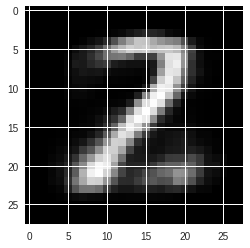

1000 31.607088 22.89873 8.708361


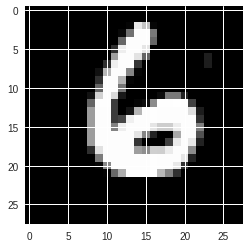

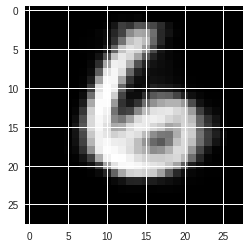

1200 33.530262 24.415203 9.115059


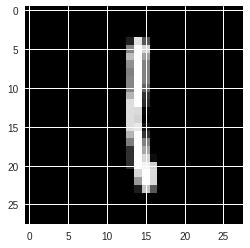

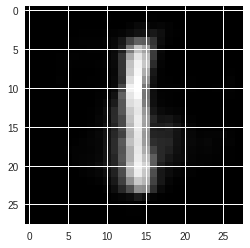

1400 32.19851 23.196682 9.001827


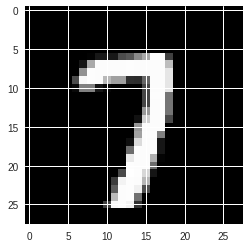

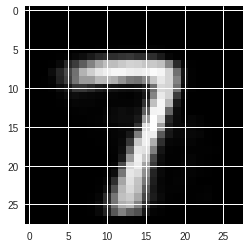

1600 29.468254 20.894781 8.573474


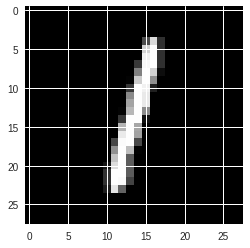

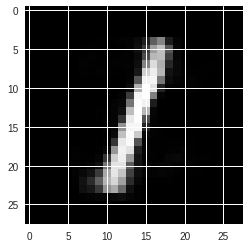

1800 30.531506 21.62294 8.908564


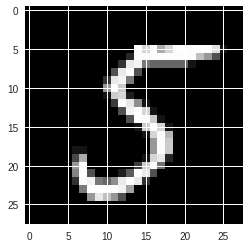

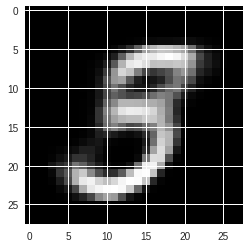

2000 29.67184 20.736084 8.935756


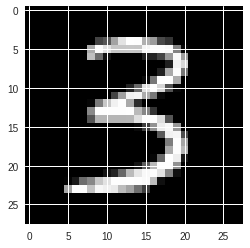

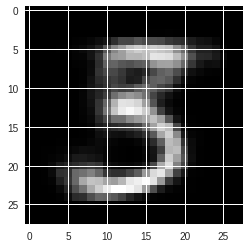

2200 30.786352 21.31805 9.4683


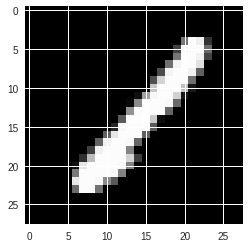

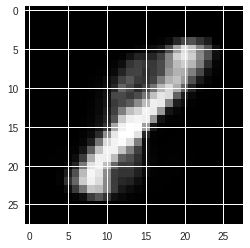

2400 31.225937 21.922935 9.303003


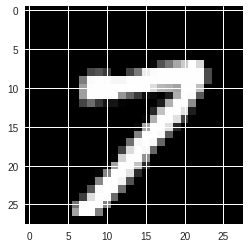

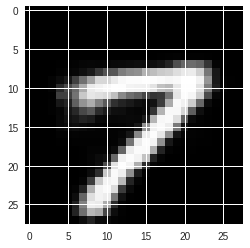

2600 29.765589 19.383898 10.381691


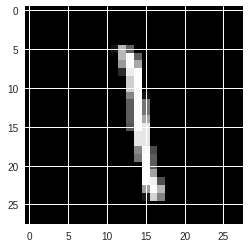

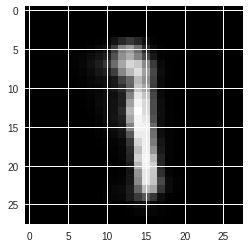

2800 30.80914 21.305038 9.504102


In [0]:
for i in range(3000):
  batch = np.array([np.reshape(b, [28, 28]) for b in mnist.train.next_batch(batch_size=batch_size)[0]])
  sess.run(optimizer, feed_dict = {X_in: batch, Y:batch, keep_prob:0.8})
  
  if not i % 200:
    ls, d, i_ls, d_ls, mu, sigm = sess.run([loss, dec, img_loss, latent_loss, mn, sd], feed_dict = {X_in: batch, Y: batch, keep_prob:1.0})
    plt.imshow(np.reshape(batch[0], [28, 28]), cmap='gray')
    plt.show()
    plt.imshow(d[0], cmap='gray')
    plt.show()
    
    print(i, ls, np.mean(i_ls), np.mean(d_ls))

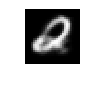

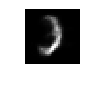

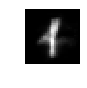

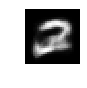

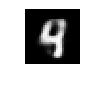

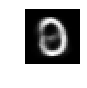

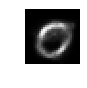

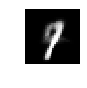

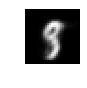

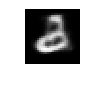

In [0]:
randoms = [np.random.normal(0, 1, n_latent) for _ in range(10)]
imgs = sess.run(dec, feed_dict = {sampled: randoms, keep_prob: 1.0})
imgs = [np.reshape(imgs[i], [28, 28]) for i in range(len(imgs))]

for img in imgs:
    plt.figure(figsize=(1,1))
    plt.axis('off')
    plt.imshow(img, cmap='gray')

In [0]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import numpy as np



Using TensorFlow backend.


In [0]:
base_model = VGG19(weights='imagenet')
model1 = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img_path = 'tiger.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model1.predict(x)

In [0]:
print(block4_pool_features)

[[[[   0.          0.          0.       ...  422.46213   458.17526
       0.      ]
   [   0.          0.          0.       ...  321.66522   261.43225
      24.57543 ]
   [ 306.8756      0.          0.       ...  707.9061    911.8994
       0.      ]
   ...
   [   0.          0.          0.       ...    0.        444.1078
       0.      ]
   [   0.         67.04802     0.       ...    0.         28.515759
       0.      ]
   [   0.        230.22641     0.       ...   86.96063   428.53873
     197.12059 ]]

  [[   0.          0.          0.       ...  336.34134   213.70915
       0.      ]
   [   0.          0.          0.       ...  239.75226   391.52832
       0.      ]
   [  39.427002    0.          0.       ...  517.5407    386.99847
       0.      ]
   ...
   [   0.          0.        257.73492  ...    0.          0.
       0.      ]
   [   0.         22.289074    0.       ...   53.66259    92.710014
       0.      ]
   [   0.          0.          0.       ...    0.          0.
   